# Simple Evolutionary Exploration  Walkthrough

This notebook contains instructions on how to use the SEE module, along with several examples. These instructions will cover the following parts: 
* [Import Image Files](#Import_Image_Files)
* [Manual Search](#Manual_Search)
* [Genetic Algorithm Search](#Genetic_Algorithm_Search)
* [Reading the Results](#Reading_the_Results)

These examples use the Jupyter widgets to make it interactive and easier to use and learn.

----
<a name="Import_Image_Files"></a>

## Import Image Files

First import the following packages:

In [1]:
# In order to run this notebooks on HPCC @ MSU, we need to install conda enviroment on the HPCC
# Video instruction can be found in https://colbrydi.github.io/tag/hpcc.html

# Steps:
# * 1: Downlaod Anaconda on HPCC, version number can be different
# wget https://repo.anaconda.com/archive/Anaconda3-5.2.0-Linux-x86_64.sh
# * 2: Install Anaconda,
# ./Anaconda3-5.2.0-Linux-x86_64.sh
# * 3: Install requirements & Make virtual env for Conda
# make init
# * 4: Unload the python on HPCC,
# module unload Python
# * 5: Run notebook
# jupyter notebook


In [2]:
%matplotlib inline
import matplotlib.pylab as plt
import imageio
from see import Segmentors
from see import JupyterGUI
# when importing [imageio,Segmentors,JupyterGUI] together, it will take about 5- 10 seconds,
# but importinh in different cells,will make it faster

Pick an image from the example folder.

Dropdown(description='Choose image:', index=8, options=(PosixPath('Image_data/Examples/AA_Chameleon.jpg'), Pos…

import imageio
img = imageio.imread('Image_data/Examples/Street.png')
gmask = imageio.imread('Image_data/Examples/Street_GT.png')


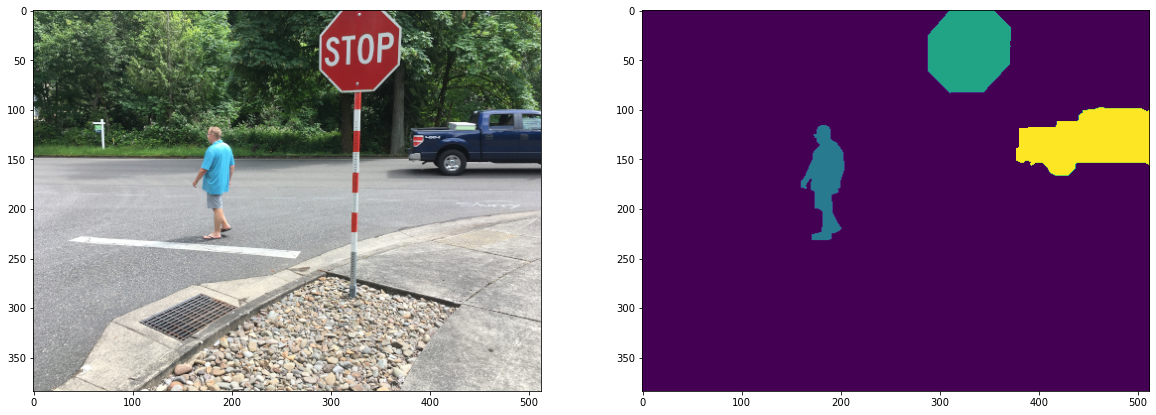

In [23]:
data = JupyterGUI.pickimage('Image_data/Examples/')

In [4]:
data.img.shape

(720, 1280, 3)

# Select ColorSpace

In [5]:
colorspace = JupyterGUI.colorwidget(data.img, paramlist=None)

seg.params = {'colorspace': 'RGB', 'multichannel': True, 'channel': 2}


GridBox(children=(SelectionSlider(continuous_update=False, description='colorspace', options=('RGB', 'HSV', 'R…

Output()

# Select ColorSpace

In [6]:
colorspace = JupyterGUI.colorwidget(data.img, paramlist=None)

seg.params = {'colorspace': 'RGB', 'multichannel': True, 'channel': 2}


GridBox(children=(SelectionSlider(continuous_update=False, description='colorspace', options=('RGB', 'HSV', 'R…

Output()

----
<a name="Manual_Search"></a>

## Manual Search

Manual searching of parameters can easily be done using the provided GUI. Pre-established parameters can be put into the widget, or the parameter values can be changed using the sliders. To change the algorithm, simply change the `alg` input. For a list of available inputs print `Segmentors.algorithmspace`


In [7]:
from see.Segmentors import segmentor

alg = JupyterGUI.picksegment(list(segmentor.algorithmspace.keys()))

Dropdown(description='Choose Algorithm:', options=('ColorThreshold', 'Felzenszwalb', 'Slic', 'SlicO', 'QuickSh…

ColorThreshold.

    Peform Color Thresholding segmentation algorithm. Segments parts of the image
    based on the numerical values for the respective channel.

    Parameters:
    mulitchannel - (multichannel) - bool, Whether the image is 2D or 3D
    colorspace - (colorspace) Select the colorspace [‘RGB’, ‘HSV’, ‘RGB CIE’, ‘XYZ’, ‘YUV’, ‘YIQ’, ‘YPbPr’, ‘YCbCr’, ‘YDbDr’]
    channel - (channel) color chanel (0:R/H/L 1:G/S/A, 2:B/V/B)
    ch0_mn - (alpha1) - minimum thresholding value for channel 0
    ch0_mx - (alpha2) - maximum thresholding value for channel 0
    ch1_mn - (beta1) - minimum thresholding value for channel 1
    ch1_mx - (beta2) - maximum thresholding value for channel 1
    ch2_mn - (gamma1) - minimum thresholding value for channel 2
    ch2_mx - (gamma2) - maximum thresholding value for channel 2

    Note: a colorspace of 'HSV' and a channel of 2 is a grayscale image.

    Typically any pixel between my_mn and my_mx are true. Other pixels are false.

    if my_mn >

In [8]:
### Example of input for params
params = JupyterGUI.segmentwidget(data.img, params = None, alg = alg.value)

GridBox(children=(SelectionSlider(continuous_update=False, description='alpha1', options=(0.0, 0.00390625, 0.0…

Output()

----
<a name="Genetic_Algorithm_Search"></a>

## Genetic Algorithm Search

First import image files, as well as the following packages:

In [9]:
from see.Segmentors import segmentor
from see.ColorSpace import colorspace
from see.Workflow import workflow
from see.Segment_Fitness import segment_fitness
from see import base_classes, GeneticSearch
#define algo work flow
workflow.addalgos([colorspace, segmentor, segment_fitness])

To run the genetic algorithm, we need to initialize an instance of an evolver. The original image and ground truth segmentation image are inputs to it, along with an integer value for population size. This value sets how many indivudals are in our population. For this example, we'll set this number to be equal to 10.

In [10]:
mydata = base_classes.pipedata()
mydata.img = data.img
mydata.gmask = data.gmask
#def geneticsearch
my_evolver = GeneticSearch.Evolver(workflow, mydata, pop_size=10)

Now that the evolver has been initialized, we can run the genetic algorithm for a specified number of generations (or iterations). Here we will set this number equal to 5.

In [11]:
# warnings may appear when this runs
#population -- Resulting population after ngen generations.
population = my_evolver.run(ngen=5) #5 generation
#fitness 1 is worse , 0 is good

Initializing a new random population
Generation 0/5 of population size 10
<class 'see.Workflow.workflow'> parameters: 
	colorspace = YCbCr
	multichannel = True
	channel = 1
	algorithm = Watershed
	alpha1 = 0.984375
	alpha2 = 0.0234375
	beta1 = 0.54296875
	beta2 = 0.40234375
	gamma1 = 0.5078125
	gamma2 = 0.265625
	n_segments = 6
	max_iter = 11

Time: 1.377 s
fitness=1.0000010079892125

<class 'see.Workflow.workflow'> parameters: 
	colorspace = HSV
	multichannel = True
	channel = 0
	algorithm = Felzenszwalb
	alpha1 = 0.75
	alpha2 = 0.73828125
	beta1 = 0.1875
	beta2 = 0.55859375
	gamma1 = 0.3046875
	gamma2 = 0.78515625
	n_segments = 8
	max_iter = 7

Time: 1.974 s
fitness=1.0004089340925688

<class 'see.Workflow.workflow'> parameters: 
	colorspace = RGB CIE
	multichannel = True
	channel = 1
	algorithm = Slic
	alpha1 = 0.50390625
	alpha2 = 0.53515625
	beta1 = 0.49609375
	beta2 = 0.109375
	gamma1 = 0.4609375
	gamma2 = 0.5546875
	n_segments = 6
	max_iter = 15



/mnt/ufs18/home-047/chenqili/local_see/see-segment/see/Segmentors.py:387: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  output = skimage.segmentation.slic(


Time: 1.025 s
fitness=0.8641281844482569

<class 'see.Workflow.workflow'> parameters: 
	colorspace = RGB
	multichannel = False
	channel = 1
	algorithm = Morphological_Chan_Vese
	alpha1 = 0.88671875
	alpha2 = 0.27734375
	beta1 = 0.33203125
	beta2 = 0.26171875
	gamma1 = 0.4765625
	gamma2 = 0.328125
	n_segments = 2
	max_iter = 14

Time: 3.624 s
fitness=1

<class 'see.Workflow.workflow'> parameters: 
	colorspace = HSV
	multichannel = False
	channel = 2
	algorithm = Morphological_Chan_Vese
	alpha1 = 0.50390625
	alpha2 = 0.38671875
	beta1 = 0.421875
	beta2 = 0.1015625
	gamma1 = 0.96484375
	gamma2 = 0.671875
	n_segments = 7
	max_iter = 17



/mnt/ufs18/home-047/chenqili/local_see/see-segment/envs/lib/python3.9/site-packages/skimage/segmentation/morphsnakes.py:106: FutureWarning: circle_level_set is deprecated in favor of disk_level_set.circle_level_set will be removed in version 0.19
  res = circle_level_set(image_shape)


Time: 3.393 s
fitness=1

<class 'see.Workflow.workflow'> parameters: 
	colorspace = YIQ
	multichannel = True
	channel = 0
	algorithm = QuickShift
	alpha1 = 0.26953125
	alpha2 = 0.890625
	beta1 = 0.3984375
	beta2 = 0.90234375
	gamma1 = 0.64453125
	gamma2 = 0.50390625
	n_segments = 1
	max_iter = 8

img.shape :  (720, 1280)
mindim :  100
ratio :  0.26953125
kernel_size :  4.984375
max_dist :  91.234375
Time: 18.313 s
fitness=1.0000310795681362

<class 'see.Workflow.workflow'> parameters: 
	colorspace = YUV
	multichannel = False
	channel = 2
	algorithm = Felzenszwalb
	alpha1 = 0.703125
	alpha2 = 0.40625
	beta1 = 0.94140625
	beta2 = 0.24609375
	gamma1 = 0.04296875
	gamma2 = 0.21875
	n_segments = 2
	max_iter = 9

Time: 1.822 s
fitness=1.0018524307669632

<class 'see.Workflow.workflow'> parameters: 
	colorspace = YPbPr
	multichannel = False
	channel = 0
	algorithm = Watershed
	alpha1 = 0.5234375
	alpha2 = 0.3671875
	beta1 = 0.3828125
	beta2 = 0.19921875
	gamma1 = 0.203125
	gamma2 = 0.02734375

Time: 1.001 s
fitness=0.7370047477892452

<class 'see.Workflow.workflow'> parameters: 
	colorspace = RGB CIE
	multichannel = True
	channel = 1
	algorithm = Slic
	alpha1 = 0.50390625
	alpha2 = 0.53515625
	beta1 = 0.34375
	beta2 = 0.109375
	gamma1 = 0.4609375
	gamma2 = 0.5546875
	n_segments = 6
	max_iter = 15

Time: 1.026 s
fitness=0.7409194210854961

<class 'see.Workflow.workflow'> parameters: 
	colorspace = RGB CIE
	multichannel = True
	channel = 0
	algorithm = SlicO
	alpha1 = 0.25
	alpha2 = 0.0546875
	beta1 = 0.49609375
	beta2 = 0.734375
	gamma1 = 0.8515625
	gamma2 = 0.19140625
	n_segments = 6
	max_iter = 8

Time: 0.847 s
fitness=1

<class 'see.Workflow.workflow'> parameters: 
	colorspace = YUV
	multichannel = True
	channel = 0
	algorithm = SlicO
	alpha1 = 0.25
	alpha2 = 0.0546875
	beta1 = 0.34375
	beta2 = 0.734375
	gamma1 = 0.8515625
	gamma2 = 0.19140625
	n_segments = 6
	max_iter = 8

Time: 0.857 s
fitness=0.8695132043293756

#BEST [0.7282114278700628,  ['YUV', True, 1, 'Slic', 0.503

Time: 1.025 s
fitness=0.7409194210854961

<class 'see.Workflow.workflow'> parameters: 
	colorspace = RGB CIE
	multichannel = True
	channel = 1
	algorithm = Slic
	alpha1 = 0.50390625
	alpha2 = 0.53515625
	beta1 = 0.49609375
	beta2 = 0.109375
	gamma1 = 0.4609375
	gamma2 = 0.5546875
	n_segments = 6
	max_iter = 15

Time: 1.014 s
fitness=0.8641281844482569

#BEST [0.7282114278700628,  ['YUV', True, 1, 'Slic', 0.50390625, 0.53515625, 0.34375, 0.109375, 0.4609375, 0.5546875, 6, 15]]
Mutating Population
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and

<class 'see.Workflow.workflow'> parameters: 
	colorspace = YUV
	multichannel = False
	channel = 0
	algorithm = Felzenszwalb
	alpha1 = 0.1875
	alpha2 = 0.921875
	beta1 = 0.74609375
	beta2 = 0.296875
	gamma1 = 0.609375
	gamma2 = 0.46875
	n_segments = 8
	max_iter = 10

Time: 4.706 s
fitness=0.13652921828966982


#BEST [0.13652921828966982,  ['YUV', False, 0, 'Felzenszwalb', 0.1875, 0.921875, 0.74609375, 0.296875, 0.609375, 0.46875, 8, 10]]

# Debuging, QuickShift taking a long time to run and broke kernel

In [12]:
# The cell above stopped at this algorithm with those parameters
# The algo and parameters might be different 

# <class 'see.Workflow.workflow'> parameters: 
# 	colorspace = YUV
# 	multichannel = False
# 	channel = 0
# 	algorithm = QuickShift
# 	alpha1 = 0.73046875
# 	alpha2 = 0.70703125
# 	beta1 = 0.89453125
# 	beta2 = 0.02734375
# 	gamma1 = 0.02734375
# 	gamma2 = 0.12109375
# 	n_segments = 1
# 	max_iter = 8

# <class 'see.Workflow.workflow'> parameters: 
# 	colorspace = RGB
# 	multichannel = True
# 	channel = 0
# 	algorithm = QuickShift
# 	alpha1 = 0.7109375
# 	alpha2 = 0.23046875
# 	beta1 = 0.8671875
# 	beta2 = 0.046875
# 	gamma1 = 0.90234375
# 	gamma2 = 0.62890625
# 	n_segments = 2
# 	max_iter = 4

# 	colorspace = HSV
# 	multichannel = False
# 	channel = 1
# 	algorithm = QuickShift
# 	alpha1 = 0.2421875
# 	alpha2 = 0.46484375
# 	beta1 = 0.26171875
# 	beta2 = 0.60546875
# 	gamma1 = 0.51171875
# 	gamma2 = 0.60546875
# 	n_segments = 5
# 	max_iter = 17

# ratio :  0.2421875
# kernel_size :  26.125
# max_dist :  581.25

In [13]:
bad = ["YPbPr",
False,
2,
"QuickShift",
0.1171875,
0.2109375,
0.79296875,
0.65625,
0.26171875,
0.72265625,
5,
18]

print('Bad Individual:\n', bad)

Bad Individual:
 ['YPbPr', False, 2, 'QuickShift', 0.1171875, 0.2109375, 0.79296875, 0.65625, 0.26171875, 0.72265625, 5, 18]


In [14]:
bad2 = ["RGB",
True,
0,
"QuickShift",
0.7109375,
0.23046875,
0.8671875,
0.046875,
0.90234375,
0.62890625,
2,
4]
print('Bad Individual:\n', bad2)


Bad Individual:
 ['RGB', True, 0, 'QuickShift', 0.7109375, 0.23046875, 0.8671875, 0.046875, 0.90234375, 0.62890625, 2, 4]


In [15]:
bad3 = ["UV",
False,
0,
"QuickShift",
0.73046875,
0.70703125,
0.89453125,
0.02734375,
0.02734375,
0.12109375,
1,
8]
print('Bad Individual:\n', bad3)

Bad Individual:
 ['UV', False, 0, 'QuickShift', 0.73046875, 0.70703125, 0.89453125, 0.02734375, 0.02734375, 0.12109375, 1, 8]


img.shape :  (720, 1280, 3)
mindim :  3
ratio :  0.73046875
kernel_size :  1.268359375
max_dist :  1.08203125


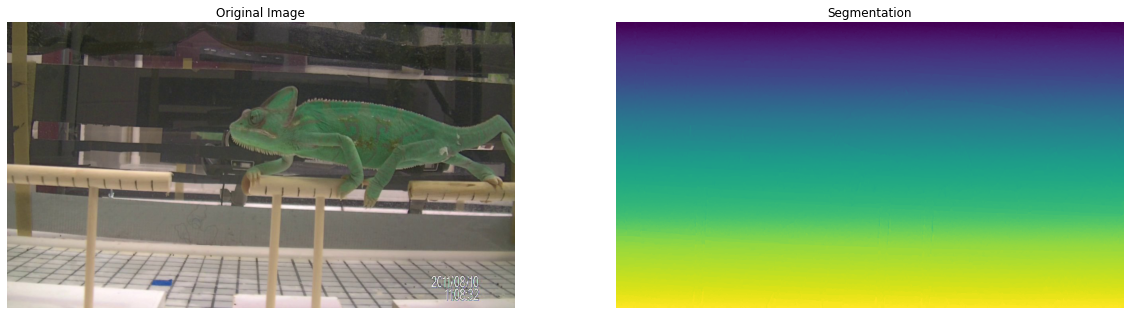

In [16]:
# when input the bad params manually, it is actually really fast, although the result is bad 
workf = workflow(bad3)
seg = segmentor(workf.params)
mask = seg.evaluate(data.img)

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(data.img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(122)
plt.imshow(mask)
plt.title("Segmentation")
plt.axis('off')

plt.tight_layout
plt.show()

In [17]:
alg2 = JupyterGUI.picksegment(list(segmentor.algorithmspace.keys()))

Dropdown(description='Choose Algorithm:', options=('ColorThreshold', 'Felzenszwalb', 'Slic', 'SlicO', 'QuickSh…

ColorThreshold.

    Peform Color Thresholding segmentation algorithm. Segments parts of the image
    based on the numerical values for the respective channel.

    Parameters:
    mulitchannel - (multichannel) - bool, Whether the image is 2D or 3D
    colorspace - (colorspace) Select the colorspace [‘RGB’, ‘HSV’, ‘RGB CIE’, ‘XYZ’, ‘YUV’, ‘YIQ’, ‘YPbPr’, ‘YCbCr’, ‘YDbDr’]
    channel - (channel) color chanel (0:R/H/L 1:G/S/A, 2:B/V/B)
    ch0_mn - (alpha1) - minimum thresholding value for channel 0
    ch0_mx - (alpha2) - maximum thresholding value for channel 0
    ch1_mn - (beta1) - minimum thresholding value for channel 1
    ch1_mx - (beta2) - maximum thresholding value for channel 1
    ch2_mn - (gamma1) - minimum thresholding value for channel 2
    ch2_mx - (gamma2) - maximum thresholding value for channel 2

    Note: a colorspace of 'HSV' and a channel of 2 is a grayscale image.

    Typically any pixel between my_mn and my_mx are true. Other pixels are false.

    if my_mn >

In [18]:
params_bad = JupyterGUI.segmentwidget(data.img, params = None, alg = alg2.value)

GridBox(children=(SelectionSlider(continuous_update=False, description='alpha1', options=(0.0, 0.00390625, 0.0…

Output()

----
<a name="Reading_the_Results"></a>

## Reading the Results

After the genetic algorithm is complete, we can retrieve the individuals that resulted in the lowest (best) fitness values by printing `my_evolver.hof`. These individuals are sorted according to fitness value, so to get the overal best individual, we can simply look at the first individual in the list. 

In [19]:
params = my_evolver.hof[0]

print('Best Individual:\n', params)

Best Individual:
 ['YUV', True, 1, 'Slic', 0.50390625, 0.53515625, 0.34375, 0.109375, 0.4609375, 0.5546875, 6, 15]


We can see the mask this individual generates by evaluating it, then plotting the result:

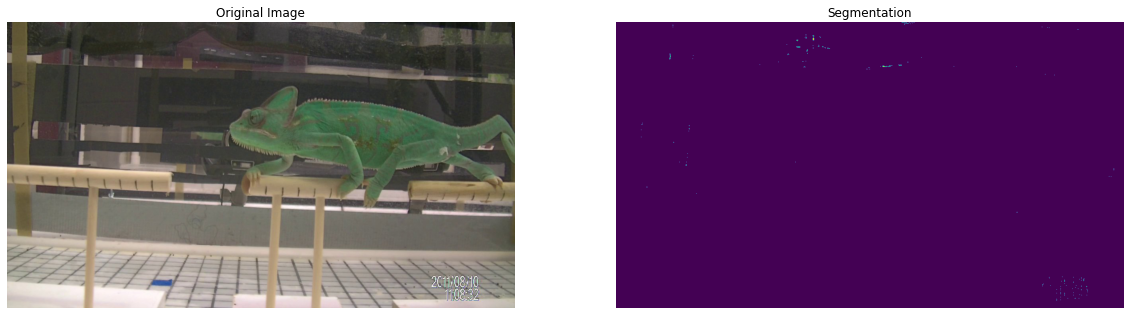

In [20]:
#['YUV', False, 0, 'Felzenszwalb', 0.1875, 0.921875, 0.74609375, 0.296875, 0.609375, 0.46875, 8, 10]
#------------------------------------
#this line is the original code
#seg = Segmentors.algoFromParams(params)
# no attribute  .algoFromParams
#------------------------------------
#what if the class is called wrong: 
#seg = segmentor(param)
# KeyError: 'YUV'
#------------------------------------

#use workflow instead, to create a workf class
#since the parameter input might produce error, use the workflow's parameter to make a seg object

#Debug***

params = ['HSV', True, 0, 'ColorThreshold', 0.25, 0.43359375, 0.19921875, 0.2421875, 0.26171875, 0.3828125, 7, 14]
#Debug***

workf = workflow(params)
seg = segmentor(workf.params)
mask = seg.evaluate(data.img)

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(data.img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(122)
plt.imshow(mask)
plt.title("Segmentation")
plt.axis('off')

plt.tight_layout
plt.show()

In [21]:
from see.Segment_Fitness import segment_fitness

We can also use `FitnessFunction` to calculate the final fitness value for this algorithm:

In [22]:
#This is original code
#print('Fitness Value: ', Segmentors.FitnessFunction(mask, data.mask)[0])
#AttributeError: module 'see.Segmentors' has no attribute 'FitnessFunction'
#------------------------------------
print('Fitness Value: ', segment_fitness().evaluate(data.mask, data.gmask)[0])

AttributeError: 'Dropdown' object has no attribute 'mask'

If this value is satisfactory, we can then get usable code to run this algorithm anywhere, including outside this notebook. The `print_best_algorithm_code` function does this using the given individual:

In [ ]:
ex = Segmentors.print_best_algorithm_code(my_evolver.hof[0])

With this code, make sure to import skimage, along with any input images this algorithm will be applied to.